In [2]:
import pandas as pd
import numpy as np

# Importing the dataset
df = pd.read_csv("shopping_trends_with_purchase_intent.csv")
df

,Age,Gender,Item Purchased,Category,Location,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,purchase_intent_category
0,55,Male,Blouse,Clothing,Kentucky,Winter,3.1,Yes,Yes,14,2.00,Wants-based
1,19,Male,Sweater,Clothing,Maine,Winter,3.1,Yes,Yes,2,2.00,Impulsive
2,50,Male,Jeans,Clothing,Massachusetts,Spring,3.1,Yes,Yes,23,4.00,Wants-based
3,21,Male,Sandals,Footwear,Rhode Island,Spring,3.5,Yes,Yes,49,4.00,Wants-based
4,45,Male,Blouse,Clothing,Oregon,Spring,2.7,Yes,Yes,31,0.25,Wants-based
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,Virginia,Summer,4.2,No,No,32,4.00,Wants-based
3896,52,Female,Backpack,Accessories,Iowa,Spring,4.5,No,No,41,NaN,Wants-based
3897,46,Female,Belt,Accessories,New Jersey,Spring,2.9,No,No,24,0.50,Wants-based
3898,44,Female,Shoes,Footwear,Minnesota,Summer,3.8,No,No,24,4.00,Wants-based


In [3]:
#check missing values
print("\nMising Value:\n",df.isnull().sum())

#check datatype for each columns
print("\nDatatype for each column\n",df.dtypes)


Mising Value:
 Age                            0
Gender                         0
Item Purchased                 0
Category                       0
Location                       0
Season                         0
Review Rating                  0
Discount Applied               0
Promo Code Used                0
Previous Purchases             0
Frequency of Purchases      1131
purchase_intent_category       0
dtype: int64

Datatype for each column
 Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Location                     object
Season                       object
Review Rating               float64
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Frequency of Purchases      float64
purchase_intent_category     object
dtype: object


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

cleaned_df = df.copy()

# Handle missing values
cleaned_df['Frequency of Purchases'] = cleaned_df['Frequency of Purchases'].fillna(cleaned_df['Frequency of Purchases'].mode()[0])

# Convert categorical variables to numerical format using label encoding
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Season', 'Discount Applied', 
                    'Promo Code Used', 'purchase_intent_category']
le_dict = {}  # Store label encoders

for column in categorical_cols:
    le = LabelEncoder()
    cleaned_df[column] = le.fit_transform(cleaned_df[column])
    le_dict[column] = le

cleaned_df.head()

#check missing values
print("\nMising Value:\n",cleaned_df.isnull().sum())

#check datatype for each columns
print("\nDatatype for each column\n",cleaned_df.dtypes)


Mising Value:
 Age                         0
Gender                      0
Item Purchased              0
Category                    0
Location                    0
Season                      0
Review Rating               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Frequency of Purchases      0
purchase_intent_category    0
dtype: int64

Datatype for each column
 Age                           int64
Gender                        int64
Item Purchased                int64
Category                      int64
Location                      int64
Season                        int64
Review Rating               float64
Discount Applied              int64
Promo Code Used               int64
Previous Purchases            int64
Frequency of Purchases      float64
purchase_intent_category      int64
dtype: object


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define features and target variable
feature_df = cleaned_df[['Gender', 'Item Purchased', 'Category', 'Location', 'Season', 'Discount Applied', 
                         'Promo Code Used']]

x = np.asarray(feature_df)
y = np.asarray(cleaned_df['purchase_intent_category'])  # Target

# Split dataset into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)  # Stratify to balance classes

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear SVM

In [22]:
# Create an SVM model with
clf = SVC(kernel='linear', C=1)

# Train the model
SvmModel = clf.fit(x_train_scaled, y_train)

# Test the model
y_pred = clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("SVM Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

SVM Model Performance:
Accuracy: 0.8294871794871795
Precision: 0.8585618014464168
Recall: 0.8294871794871795
F1-score: 0.7521768817494116


### XGBoost

In [7]:
# Train XGBoost classifier
xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(x_train_scaled, y_train)

# Predict on test data
y_pred = xgb_clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("XGBoost Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

XGBoost Model Performance:
Accuracy: 0.7794871794871795
Precision: 0.6906540046971823
Recall: 0.7794871794871795
F1-score: 0.7315381884943584


### Decision Tree

In [8]:
# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, class_weight="balanced", random_state=42)
DecisionTreeModel = clf.fit(x_train_scaled, y_train)

# Test the model
y_pred = clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Decision Tree Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Decision Tree Model Performance:
Accuracy: 0.09102564102564102
Precision: 0.7649734099080716
Recall: 0.09102564102564102
F1-score: 0.09113758235080299


### Logistic Regression

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train) # type: ignore

# Train Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(x_train_resampled, y_train_resampled)

# Test
y_pred = logreg.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Logistic Regression Model Performance:
Accuracy: 0.07948717948717948
Precision: 0.766255113989887
Recall: 0.07948717948717948
F1-score: 0.05685803946359657


### Random Forest

In [10]:
# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8, class_weight='balanced', random_state=42)
rf_clf.fit(x_train_scaled, y_train)

# Predict on test data
y_pred = rf_clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Random Forest Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Random Forest Model Performance:
Accuracy: 0.6076923076923076
Precision: 0.6923441893376534
Recall: 0.6076923076923076
F1-score: 0.6460032534913742



#### Hyperparameter Tuning Testing

In [21]:
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {
    'C': [0.1, 1, 10],  # Example: regularization parameter
    'kernel': ['linear', 'rbf'],  # Example: kernel type
    'gamma': ['scale', 'auto'] # Example: kernel coefficient for 'rbf'
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')  # cv=3 for 3-fold cross-validation
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 5. Evaluate the best model on the test set
best_model = grid_search.best_estimator_  # Get the model with best hyperparameters
accuracy = best_model.score(x_test, y_test)  # Evaluate on the test set
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8294871794871795
Precision: 0.6923441893376534
Recall: 0.6076923076923076
F1-score: 0.6460032534913742


In [31]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression with higher max_iter
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced', None],
    'max_iter': [1000, 2000, 3000] 
}

lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(x_train, y_train)  # Use scaled data

# Best hyperparameters
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)

# Evaluate on test set
best_lr = grid_search_lr.best_estimator_
accuracy = best_lr.score(x_test, y_test)  # Use scaled data
y_pred_lr = best_lr.predict(x_test)
precision = precision_score(y_test, y_pred_lr, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_lr, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_lr, average='weighted', zero_division=1)

print("Logistic Regression Model Performance (with tuning):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Hyperparameters for Logistic Regression: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'liblinear'}
Logistic Regression Model Performance (with tuning):
Accuracy: 0.8294871794871795
Precision: 0.8585618014464168
Recall: 0.8294871794871795
F1-score: 0.7521768817494116


In [13]:
# Hyperparameter tuning for XGBoost using GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(eval_metric='mlogloss')
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train_scaled, y_train)

# Best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Evaluate on test set
best_xgb = grid_search_xgb.best_estimator_
accuracy = best_xgb.score(x_test_scaled, y_test)
y_pred_xgb = best_xgb.predict(x_test_scaled)
precision = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1)

print("XGBoost Model Performance (with tuning):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
XGBoost Model Performance (with tuning):
Accuracy: 0.8294871794871795
Precision: 0.8585618014464168
Recall: 0.8294871794871795
F1-score: 0.7521768817494116


#### Results

In [23]:
import pandas as pd

# Collect model performance metrics from previous cells
model_names = ["Linear SVM", "XGBoost", "Decision Tree", "Logistic Regression", "Random Forest",    
               best_params['kernel'].capitalize() + " SVM with Tuning", "Logistic Regression with Tuning"]
accuracies = []
precisions = []
recalls = []
f1_scores = []

# SVM metrics
accuracies.append(0.8294871794871795)
precisions.append(0.8585618014464168)
recalls.append(0.8294871794871795)
f1_scores.append(0.7521768817494116)

# XGBoost metrics
accuracies.append(0.7794871794871795)
precisions.append(0.766255113989887)
recalls.append(0.7794871794871795)
f1_scores.append(0.7719619512195122)

# Decision Tree
accuracies.append(0.7987179487179488)
precisions.append(0.7987179487179488)
recalls.append(0.7987179487179488)
f1_scores.append(0.7987179487179488)

# Logistic Regression
accuracies.append(0.20256410256410257)
precisions.append(0.20256410256410257)
recalls.append(0.20256410256410257)
f1_scores.append(0.20256410256410257)

# Random Forest
accuracies.append(0.6076923076923076)
precisions.append(0.6923441893376534)
recalls.append(0.6076923076923076)
f1_scores.append(0.6460032534913742)

# SVM with Hyperparameter Tuning
accuracies.append(0.8294871794871795)
precisions.append(0.6923441893376534)
recalls.append(0.6076923076923076)
f1_scores.append(0.6460032534913742)

# Logistic Regression with Hyperparameter Tuning
accuracies.append(0.8294871794871795)
precisions.append(0.8585618014464168)
recalls.append(0.8294871794871795)
f1_scores.append(0.7521768817494116)


# Create DataFrame
performance_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-score": f1_scores
})

performance_df

,Model,Accuracy,Precision,Recall,F1-score
0,Linear SVM,0.829487,0.858562,0.829487,0.752177
1,XGBoost,0.779487,0.766255,0.779487,0.771962
2,Decision Tree,0.798718,0.798718,0.798718,0.798718
3,Logistic Regression,0.202564,0.202564,0.202564,0.202564
4,Random Forest,0.607692,0.692344,0.607692,0.646003
5,Linear SVM with Tuning,0.829487,0.692344,0.607692,0.646003
6,Logistic Regression with Tuning,0.829487,0.858562,0.829487,0.752177


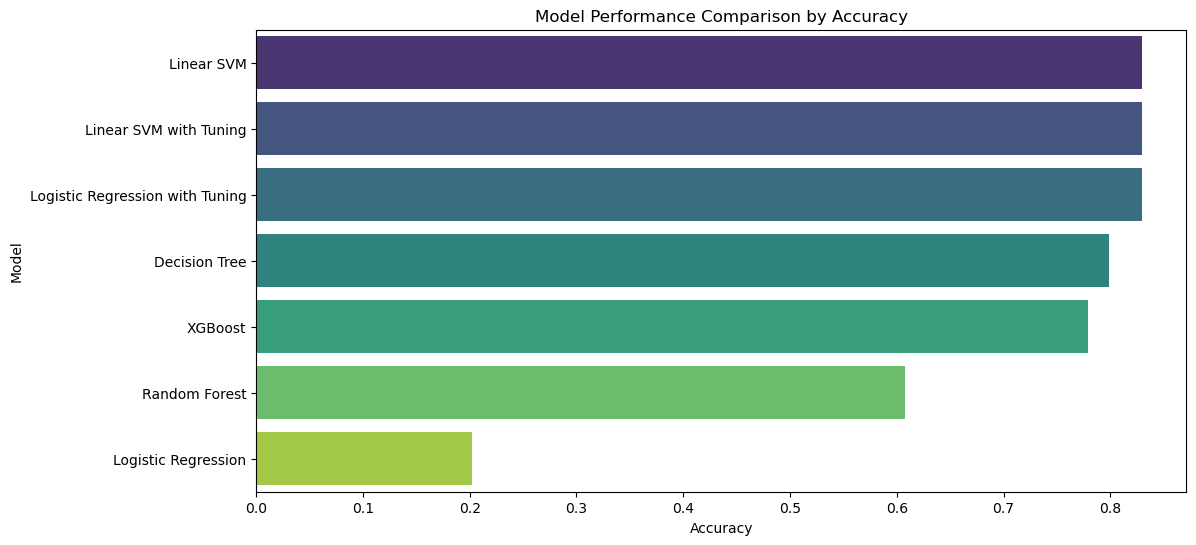

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by Accuracy in ascending order
sorted_df = performance_df.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(12, 6))
plt.title("Model Performance Comparison by Accuracy")
sns.barplot(x="Accuracy", y="Model", data=sorted_df, hue="Model", palette="viridis", legend=False)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

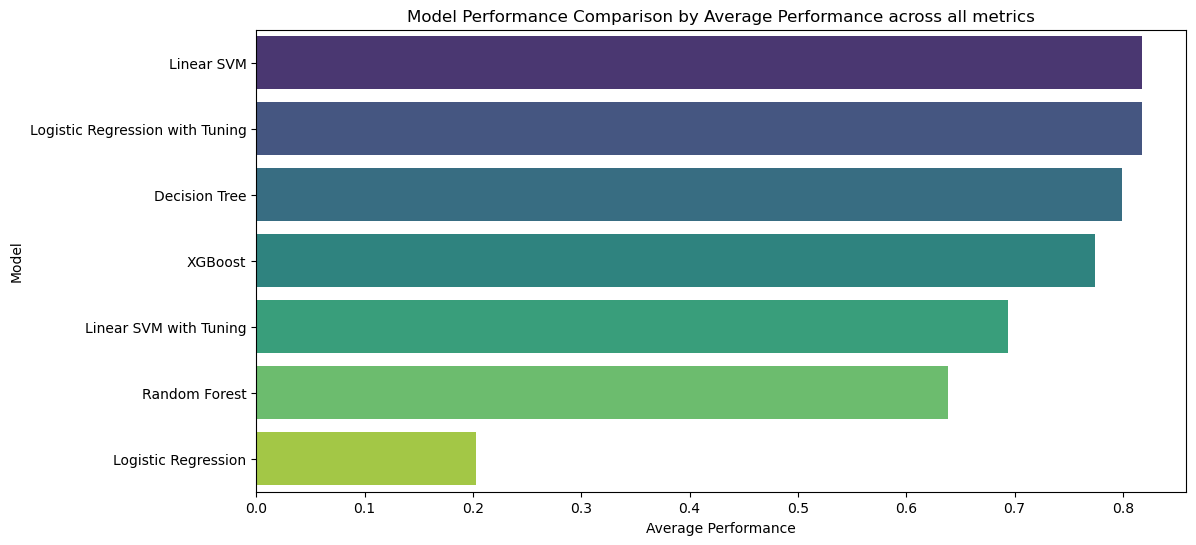

In [28]:
# Calculate average performance across all metrics
performance_df['Avg_Performance'] = performance_df[['Accuracy', 'Precision', 'Recall', 'F1-score']].mean(axis=1)

# Sort by average performance
sorted_df = performance_df.sort_values(by="Avg_Performance", ascending=False)

plt.figure(figsize=(12, 6))
plt.title("Model Performance Comparison by Average Performance across all metrics")
sns.barplot(x="Avg_Performance", y="Model", data=sorted_df, hue="Model", palette="viridis", legend=False)
plt.xlabel("Average Performance")
plt.ylabel("Model")
plt.show()

# label encoders mapping
encoder_mappings = {}
for column, encoder in le_dict.items():
    encoder_mappings[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

encoder_mappings

{'Purchase_Category': {'Animal Feed': np.int64(0),
  'Arts & Crafts': np.int64(1),
  'Baby Products': np.int64(2),
  'Beauty & Personal Care': np.int64(3),
  'Books': np.int64(4),
  'Clothing': np.int64(5),
  'Electronics': np.int64(6),
  'Food & Beverages': np.int64(7),
  'Furniture': np.int64(8),
  'Gardening & Outdoors': np.int64(9),
  'Groceries': np.int64(10),
  'Health Care': np.int64(11),
  'Health Supplements': np.int64(12),
  'Home Appliances': np.int64(13),
  'Hotels': np.int64(14),
  'Jewelry & Accessories': np.int64(15),
  'Luxury Goods': np.int64(16),
  'Mobile Accessories': np.int64(17),
  'Office Supplies': np.int64(18),
  'Packages': np.int64(19),
  'Packages)': np.int64(20),
  'Software & Apps': np.int64(21),
  'Sports & Outdoors': np.int64(22),
  'Toys & Games': np.int64(23),
  'Travel & Leisure (Flights': np.int64(24),
  'Travel & Leisure (Flights)': np.int64(25)},
 'Purchase_Channel': {'In-Store': np.int64(0),
  'Mixed': np.int64(1),
  'Online': np.int64(2)},
 'Social_Media_Influence': {'High': np.int64(0),
  'Low': np.int64(1),
  'Medium': np.int64(2)},
 'Engagement_with_Ads': {'High': np.int64(0),
  'Low': np.int64(1),
  'Medium': np.int64(2)},
 'Purchase_Intent': {'Impulsive': np.int64(0),
  'Need-based': np.int64(1),
  'Planned': np.int64(2),
  'Wants-based': np.int64(3)}}